In [1]:
import time
import random
import matplotlib.pyplot as plt
from bisect import bisect_left

print("Dynamic Programming Examples\n")

Dynamic Programming Examples



In [2]:
# Helper timing function

def time_it(fn, *args, repeat=3, name=None):
    best = float("inf")
    result = None
    for _ in range(repeat):
        t0 = time.perf_counter()
        result = fn(*args)
        t1 = time.perf_counter()
        best = min(best, t1 - t0)
    return best, result

In [3]:
# 1. Fibonacci

def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

def fib_memo(n, memo=None):
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fib_memo(n-1, memo) + fib_memo(n-2, memo)
    return memo[n]

def fib_tab(n):
    if n <= 1:
        return n
    dp = [0]*(n+1)
    dp[1] = 1
    for i in range(2, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    return dp[n]

def fib_o1(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n+1):
        a, b = b, a+b
    return b


print("=== Fibonacci ===")

n = 30

t_rec, r1 = time_it(fib_recursive, n, repeat=1)
t_mem, r2 = time_it(fib_memo, n)
t_tab, r3 = time_it(fib_tab, n)
t_o1,  r4 = time_it(fib_o1, n)

print("Result:", r1)
print("recursive:", t_rec)
print("memo     :", t_mem)
print("tab      :", t_tab)
print("O(1)     :", t_o1)

=== Fibonacci ===
Result: 832040
recursive: 0.20949232699990716
memo     : 7.757000048513873e-06
tab      : 2.83800000033807e-06
O(1)     : 1.4790000477660215e-06


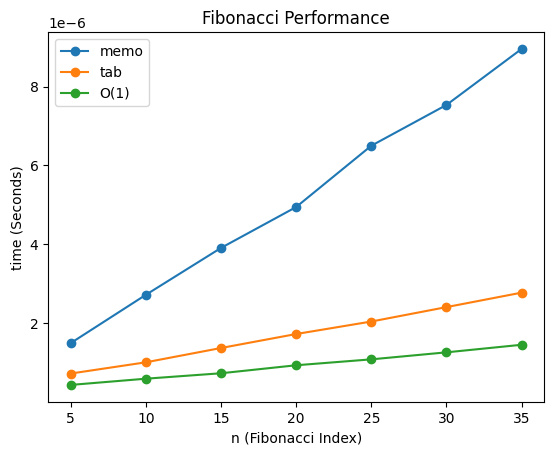

In [4]:
# Plot Fibonacci performance
ns = list(range(5, 36, 5))
times_mem, times_tab, times_o1 = [], [], []

for n in ns:
    times_mem.append(time_it(fib_memo, n)[0])
    times_tab.append(time_it(fib_tab, n)[0])
    times_o1.append(time_it(fib_o1, n)[0])

plt.figure()
plt.plot(ns, times_mem, marker="o", label="memo")
plt.plot(ns, times_tab, marker="o", label="tab")
plt.plot(ns, times_o1, marker="o", label="O(1)")
plt.title("Fibonacci Performance")
plt.xlabel("n (Fibonacci Index)")
plt.ylabel("time (Seconds)")
plt.legend()
plt.show()

In [5]:
# ============================================================
# 2. Climbing Stairs
# ============================================================

def climb_dp(n):
    if n <= 2:
        return n
    dp = [0]*(n+1)
    dp[1], dp[2] = 1, 2
    for i in range(3, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    return dp[n]

def climb_o1(n):
    if n <= 2:
        return n
    a, b = 1, 2
    for _ in range(3, n+1):
        a, b = b, a+b
    return b


print("\n=== Climbing Stairs ===")

n = 10000

t1, r1 = time_it(climb_dp, n)
t2, r2 = time_it(climb_o1, n)

print("Result:", r1 == r2)
print("DP:", t1)
print("O(1):", t2)


=== Climbing Stairs ===
Result: True
DP: 0.0029266980000102194
O(1): 0.0018275109998739936


In [6]:
# ============================================================
# 3. Coin Change
# ============================================================

def coin_min(coins, amount):
    dp = [float("inf")] * (amount+1)
    dp[0] = 0
    for coin in coins:
        for i in range(coin, amount+1):
            dp[i] = min(dp[i], dp[i-coin] + 1)
    return -1 if dp[amount] == float("inf") else dp[amount]

def coin_ways(coins, amount):
    dp = [0]*(amount+1)
    dp[0] = 1
    for coin in coins:
        for i in range(coin, amount+1):
            dp[i] += dp[i-coin]
    return dp[amount]


print("\n=== Coin Change ===")

print("Min coins:", coin_min([1,2,5], 11))
print("Ways:", coin_ways([1,2,5], 5))


=== Coin Change ===
Min coins: 3
Ways: 4


In [7]:
# ============================================================
# 4. LIS
# ============================================================

def lis_n2(nums):
    n = len(nums)
    dp = [1]*n
    for i in range(n):
        for j in range(i):
            if nums[i] > nums[j]:
                dp[i] = max(dp[i], dp[j]+1)
    return max(dp)

def lis_nlogn(nums):
    tails = []
    for x in nums:
        i = bisect_left(tails, x)
        if i == len(tails):
            tails.append(x)
        else:
            tails[i] = x
    return len(tails)


print("\n=== LIS ===")

nums = [random.randint(0,10000) for _ in range(2000)]

t1, r1 = time_it(lis_n2, nums, repeat=1)
t2, r2 = time_it(lis_nlogn, nums)

print("Length:", r1, r2)
print("O(n^2):", t1)
print("O(nlogn):", t2)


=== LIS ===
Length: 81 81
O(n^2): 0.2786948990001292
O(nlogn): 0.00035846100013259274


In [8]:
# ============================================================
# 5. Knapsack
# ============================================================

def knapsack_2d(weights, values, cap):
    n = len(weights)
    dp = [[0]*(cap+1) for _ in range(n+1)]
    for i in range(1, n+1):
        w, v = weights[i-1], values[i-1]
        for c in range(cap+1):
            dp[i][c] = dp[i-1][c]
            if w <= c:
                dp[i][c] = max(dp[i][c], v + dp[i-1][c-w])
    return dp[n][cap]

def knapsack_1d(weights, values, cap):
    dp = [0]*(cap+1)
    for w, v in zip(weights, values):
        for c in range(cap, w-1, -1):
            dp[c] = max(dp[c], v + dp[c-w])
    return dp[cap]


print("\n=== Knapsack ===")

weights = [1,3,4,5]
values = [1,4,5,7]
cap = 7

print("2D:", knapsack_2d(weights, values, cap))
print("1D:", knapsack_1d(weights, values, cap))


=== Knapsack ===
2D: 9
1D: 9


In [9]:
# ============================================================
# 6. LCS
# ============================================================

def lcs_table(a, b):
    m, n = len(a), len(b)
    dp = [[0]*(n+1) for _ in range(m+1)]
    for i in range(1, m+1):
        for j in range(1, n+1):
            if a[i-1] == b[j-1]:
                dp[i][j] = 1 + dp[i-1][j-1]
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    return dp

def lcs_reconstruct(a, b):
    dp = lcs_table(a, b)
    i, j = len(a), len(b)
    result = []
    while i > 0 and j > 0:
        if a[i-1] == b[j-1]:
            result.append(a[i-1])
            i -= 1
            j -= 1
        elif dp[i-1][j] >= dp[i][j-1]:
            i -= 1
        else:
            j -= 1
    result.reverse()
    return dp[len(a)][len(b)], "".join(result)


print("\n=== LCS ===")

length, seq = lcs_reconstruct("abcde", "ace")

print("Length:", length)
print("Sequence:", seq)


=== LCS ===
Length: 3
Sequence: ace
